In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from math import exp
from sklearn.datasets import make_classification, make_gaussian_quantiles

import warnings, itertools
warnings.filterwarnings('ignore')
from mpltools import style
style.use('ggplot')

<h1>Generate some data</h1>
<p>Let's start with a 2-class problem in 2 dimentions</p>

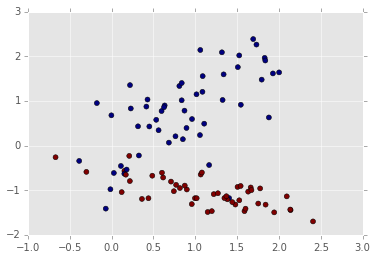

In [4]:
X0, y0 = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=18)
plt.scatter(X0[:,0], X0[:,1], marker='o', c=y0, s=25, edgecolor='k')

<h1>Build the model</h1>
<p>Create train test splits for your data.  Use the training data to .</p>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.25, random_state=30)

# define and train logistic regression model
# n.b. there are a lot of parameters in the model, the default model is fine to start with
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<h2>Generate classification predictions</h2>
<p>Use the models 'predict' function to create classification output on your test set.  Build a confusion matrix to express the performance of the model.</p>

In [11]:
#taken from 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.92, f1 score: 0.9333333333333333
Confusion matrix, without normalization
[[ 9  2]
 [ 0 14]]


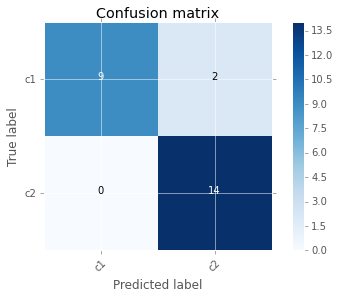

In [14]:
# Stop once we complete this cell, we will discuss ROC curves
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc


# Create prediction array.  
preds = log_reg.predict(X_test)

# Use the sklearn confusion matrix class to create a confusion matrix, call the variable "cm"
# so it works with the last line of this cell
cm = confusion_matrix(y_test, preds)

#Print the accuracy_score and f1 score
print("Accuracy: {}, f1 score: {}".format(accuracy_score(y_test, preds), f1_score(y_test, preds)))

# Defined in cell above
plot_confusion_matrix(cm, ["c1", "c2"])

<h1>STOP!</h1>



<h2>Create ROC Curve</h2>
<p>Use the "predict_proba" method for your model to give probability scores.  Generate and plot a ROC curve for variable thresholds</p>

In [ ]:
# Create array of regression scores for both classes using the 'predict_proba' class
##YOUR CODE GOES HERE

# n.b. this class outputs probabilities for both admission and rejection.  
# Create an array of just the admission probabilities
##YOUR CODE GOES HERE

# Use the roc_curve method to create false positive rates, true positive rates
##YOUR CODE GOES HERE

# Use these rates to generate an 'area under the curve score', print it
##YOUR CODE GOES HERE

In [ ]:
# Plot the ROC curve.
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % r_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()